In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
"""
Simple Jones Vector class
see http://en.wikipedia.org/wiki/Jones_calculus
currently does not normalize the output
"""
import numpy as np
from numpy import pi


def rotator(angle):
    s = np.sin(angle)
    c = np.cos(angle)
    return np.matrix([[c,-s],[s,c]])

    
class Component(np.matrix):

    def __new__(self,matrix):
        return super(Component,self).__new__(self,matrix)
    
    def rotate(self, angle):
        return rotator(angle)*self*rotator(-angle)


def HalfWavePlate():
    return Component([[1,0],[0,-1]])
def QuaterWavePlate():
    return Component([[1,0],[0,1j]])
def Birefringence( w1, w2):
    return Component([[np.exp(1j*w1),0],[0,np.exp(1j*w2)]])


def Hpol():
    return np.matrix([[1],[0]])
def Vpol():
    return np.matrix([[0],[1]])
def D1pol():
    return np.matrix([[1],[1]])/np.sqrt(2)
def D2pol():
    return np.matrix([[1],[-1]])/np.sqrt(2)
def C1pol():
    return np.matrix([[1],[1j]])/np.sqrt(2)
def C2pol():
    return np.matrix([[1],[-1j]])/np.sqrt(2)


def PolarizerH():
    return Component(Hpol()*Hpol().T)
def PolarizerV():
    return Component(Vpol()*Vpol().T)    

In [3]:
Q = QuaterWavePlate()
Q

matrix([[ 1.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+1.j]])

In [4]:
H = HalfWavePlate()
H

matrix([[ 1,  0],
        [ 0, -1]])

In [5]:
Vp = Vpol()
Hp = Hpol()

<IPython.core.display.Javascript object>


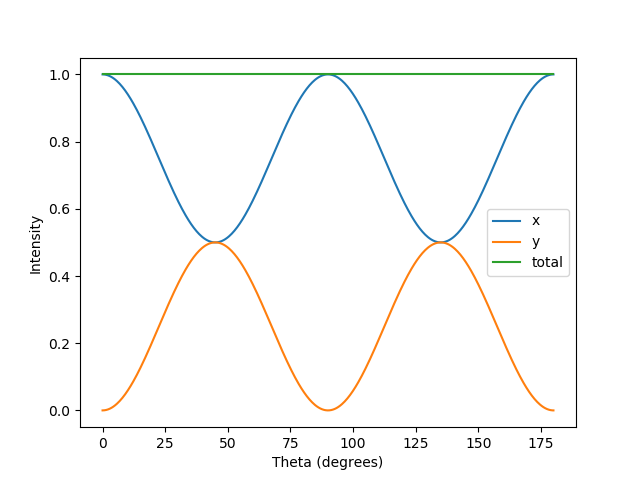

In [7]:
theta =  np.linspace(0, np.pi, num=500, endpoint=True)
out = []
for th in theta:
    out.append(Q.rotate(th)*Hp)
out = np.array(out)

def intensity(x):
    return abs(x)**2

plt.plot(theta/np.pi*180, intensity(out[:, 0]), label='x')
plt.plot(theta/np.pi*180, intensity(out[:, 1]), label='y')
plt.plot(theta/np.pi*180, intensity(out[:, 0]) + intensity(out[:, 1]), label='total')
plt.xlabel('Theta (degrees)')
plt.ylabel('Intensity')
plt.legend()

In [54]:
H*Q.rotate(pi/2)*V

matrix([[  6.12323400e-17 -6.12323400e-17j],
        [  1.00000000e+00 +3.74939946e-33j]])

In [47]:
# A diagonal polarized light go through a quaterwave plate(90 degree) and a halfwave plate(45 degree)
D = D1pol()
Q.rotate(pi/4)*H.rotate(pi/8)*D

matrix([[ 0.5+0.5j],
        [ 0.5-0.5j]])

In [32]:
D = Hpol()
Q1 = QuaterWavePlate()
H = HalfWavePlate()
Q2 = QuaterWavePlate()

th_list = np.linspace(0, pi)
out = []
for theta in th_list:
    out.append(Q1*H.rotate(theta)*Q2*D)

In [33]:
np.abs(out)

array([[[  1.00000000e+00],
        [  0.00000000e+00]],

       [[  9.91790014e-01],
        [  1.27877162e-01]],

       [[  9.67294863e-01],
        [  2.53654584e-01]],

       [[  9.26916757e-01],
        [  3.75267005e-01]],

       [[  8.71318704e-01],
        [  4.90717552e-01]],

       [[  8.01413622e-01],
        [  5.98110530e-01]],

       [[  7.18349350e-01],
        [  6.95682551e-01]],

       [[  6.23489802e-01],
        [  7.81831482e-01]],

       [[  5.18392568e-01],
        [  8.55142763e-01]],

       [[  4.04783343e-01],
        [  9.14412623e-01]],

       [[  2.84527587e-01],
        [  9.58667853e-01]],

       [[  1.59599895e-01],
        [  9.87181783e-01]],

       [[  3.20515776e-02],
        [  9.99486216e-01]],

       [[  9.60230259e-02],
        [  9.95379113e-01]],

       [[  2.22520934e-01],
        [  9.74927912e-01]],

       [[  3.45365054e-01],
        [  9.38468422e-01]],

       [[  4.62538290e-01],
        [  8.86599306e-01]],

       [[  5.7

In [26]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(th_list, out)

<IPython.core.display.Javascript object>

ValueError: x and y can be no greater than 2-D, but have shapes (50,) and (50, 2, 1)